# Tomography xphase simple tests
This notebook is an example to be used with the "Tomography / Xphase / GPU" kernel.

### Import modules
Just to check that no unexpected errors pop up.

In [1]:
import matplotlib
import pandas
from LightPipes import *
import skimage
import tifffile

print("No errors in loading of modules, yeah!")

No errors in loading of modules, yeah!


### Example plotting with LightPipes
Taken from [an example in the documentation](https://opticspy.github.io/lightpipes/examples_of_lightpipes_for_python.html)

Added ipympl support via 
```python
%matplotlib widget
``` 
inorder to have interactive 3D plots.

roundtrip Strehl ratio


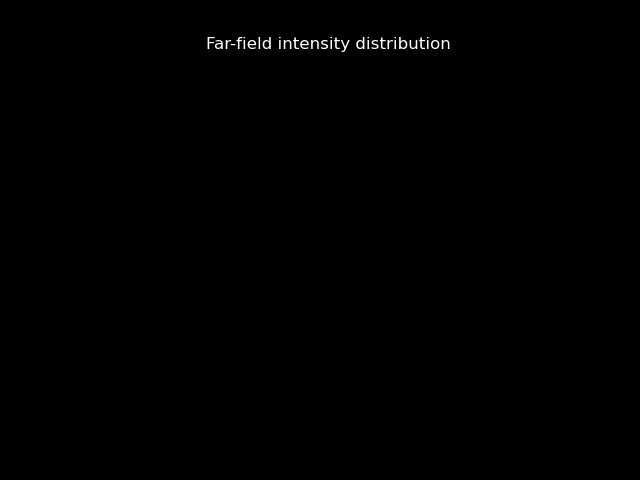

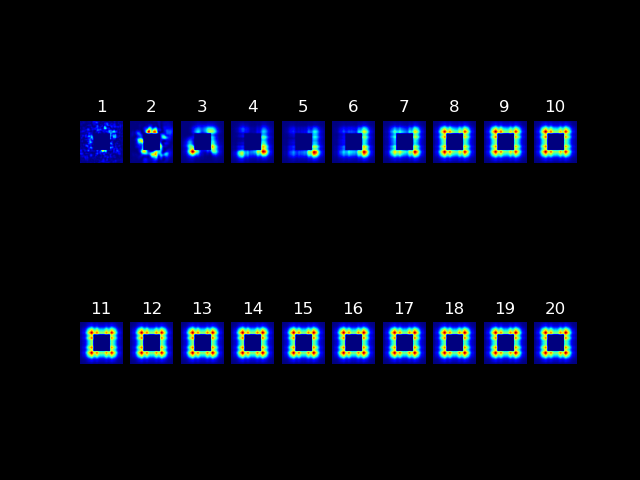

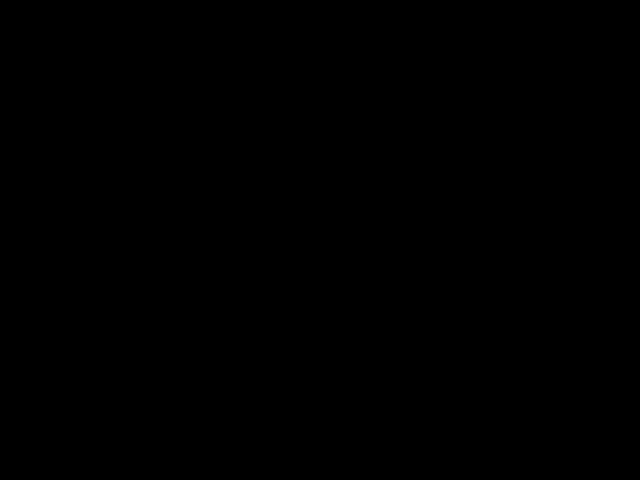

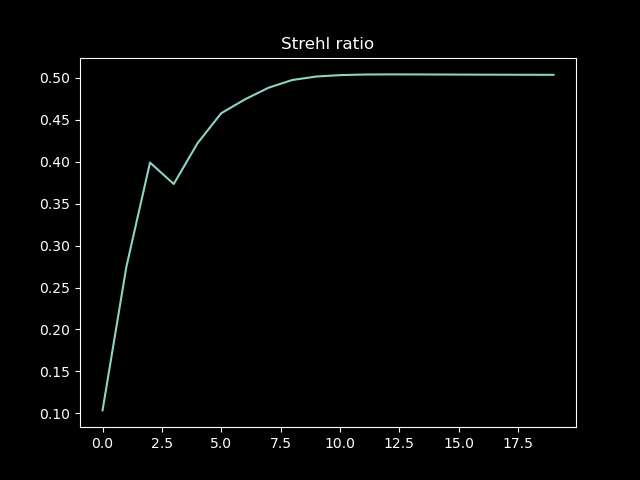

In [2]:
%matplotlib widget

from LightPipes import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import time

wavelength = 1000*nm
size=14*mm
N=100
w=5.48*mm
f1=-2.0*m; f2=4.0*m; L=2.0*m; Isat=1.0; alpha=1e-4; Lgain=1e4;
tx=0.0; ty=0.00000;
Nrndtrips=20

X=np.zeros(N)
Y=np.zeros(N)
SR=np.zeros(Nrndtrips+1)
F=Begin(size,wavelength,N);
F=RandomIntensity(time.time(),1000,F)
F=RandomPhase(time.time(),10,F);

plt.style.use('dark_background')

print('{0} {1}'.format('roundtrip', 'Strehl ratio'))
for k in range(1,Nrndtrips+1):
   F=RectAperture(w,w,0,0,0,F);
   F=Gain(Isat,alpha,2*Lgain,F);
   F=LensFresnel(f1,L,F);
   F=LensFresnel(f2,L,F);
   F=Tilt(tx,ty,F);
   SR[k]=Strehl(F);
   F=Interpol(size,N,0,0,0,1,F);
   # print('  {0:2d}          {1:0.3f}'.format(k, SR[k]))
   F2=RectScreen(w,w,0,0,0,F);
   I=Intensity(2,F2);
   plt.subplot(2, int(Nrndtrips/2),k)
   plt.title(k)
   plt.axis('off')
   plt.imshow(I,cmap='jet')

F2=Convert(F2);
i=range(N)
j=i
X, Y=np.meshgrid(i,j)
I=np.array(I)
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.gca()

# surf = ax.plot_surface(X, Y, I, rstride=2, cstride=2, cmap='rainbow', linewidth=0.0)
plt.axis('off');

fig = plt.figure()
x=np.arange(1,1,Nrndtrips+1);
plt.plot(SR[1:Nrndtrips+1])
plt.title('Strehl ratio')

# Far-field calculation:
z=0.1*m; f=4.0*m;
ff=z*f/(f-z);
F2=Lens(f,0,0,F2);
F2=LensFresnel(ff,z,F2);
F2=Convert(F2);
I2=Intensity(1,F2);
I2=np.array(I2)
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.gca()
# surf = ax.plot_surface(X, Y, I2, rstride=1, cstride=1, cmap='rainbow', linewidth=0.0)
plt.axis('off'); plt.title('Far-field intensity distribution')

plt.show()